# Cyrptocurrency Growth Simulation

The **Cryptocurrency Growth Simulation** notebook models the growth of users and daily transactions, a cryptocurrency wallet for users, over a one-year period. This simulation uses simple growth parameters to project adoption and usage trends.

---

## **Key Components of the Simulation**

### **Parameters**
The simulation relies on the following initial parameters:
- **`initial_users`**: The starting number of users. In this case, it is set to `1000`.
- **`adoption_rate`**: The daily growth rate of users (e.g., `0.05` represents 5% growth per day). This reflects new users joining based on its current user base.
- **`usage_rate`**: The proportion of users actively using the wallet on a daily basis. Here, it is set to `0.8` (80%).
- **`time_steps`**: The simulation period in days, set to `365` for a year.

---

### **2. Simulation Logic**
The simulation calculates two main metrics for each day:

#### **Total Users (`users`)**
- Each day, the number of new users is computed as a percentage (`adoption_rate`) of the current user base.
- The total user count is updated by adding the new users to the existing base.

$$
\text{New Users} = \text{Users}_{t-1} \times \text{Adoption Rate}
$$

$$
\text{Users}_t = \text{Users}_{t-1} + \text{New Users}
$$



2. Daily Transactions (`daily_transactions`):

- The number of daily transactions is calculated as a proportion (`usage_rate`) of the total user base on each day.

$$ \text{Daily Transactions}_t​ = \text{Users}_t \times \text{Usage Rate} $$

### **3. Visualization**

The following cell generates a line plot to visualize:

- **Total Users**: How the user base grows over the simulation period.
- **Daily Transactions**: How the transaction count changes in response to user growth.

In [1]:
## Import The Necessary Libraries

import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime

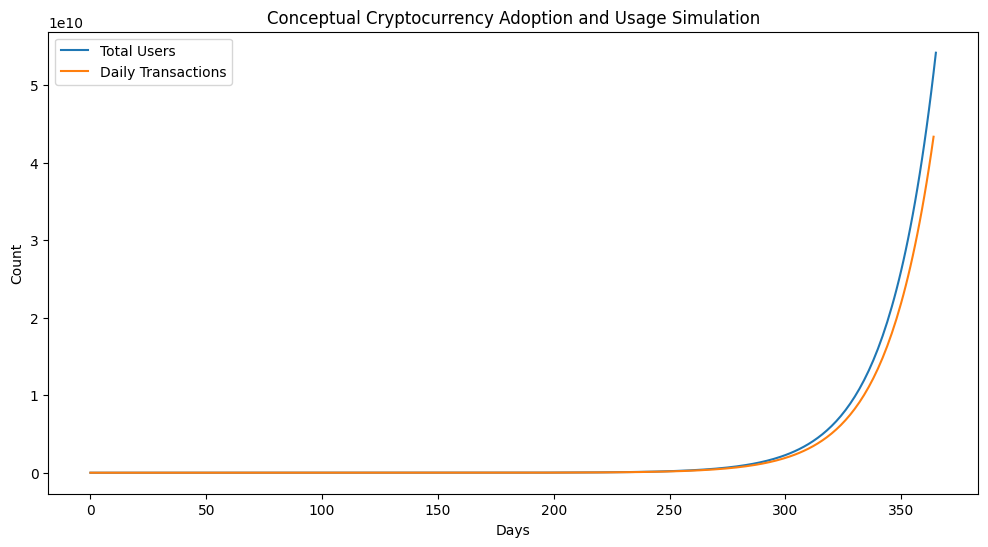

In [2]:
# Parameters
initial_users = 1000
adoption_rate = 0.05  # 5% new users per time step
usage_rate = 0.8  # 80% of users use the wallet daily
time_steps = 365  # Simulate for one year

# Simulation
users = [initial_users]
daily_transactions = []

for t in range(time_steps):
    new_users = users[-1] * adoption_rate
    users.append(users[-1] + new_users)
    daily_transactions.append(users[-1] * usage_rate)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(users, label="Total Users")
plt.plot(daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.title("Conceptual Cryptocurrency Adoption and Usage Simulation")
plt.show()

## **Simulation Parameters**

- **`initial_users`**: Starting user base, set to `1000`.
- **`carrying_capacity`**: Maximum potential user base, assumed to correlate with the other crypto hashrate, set to `100,000`.
- **`growth_rate`**: User growth per time step, set to `10%` (`0.10`).
- **`time_steps`**: Simulation duration, set to `365` days (one year).

These parameters set the stage for simulating user growth dynamics within a defined ecosystem limit.


In [3]:
# Parameters
initial_users = 1000
carrying_capacity = (
    100000  # assumption: carrying capacity is highly correlated w/ hashrate
)
growth_rate = 0.10  # per time step
# adoption_rate = 0.05  # 5% new users per time step
# usage_rate = 0.8  # 80% of users use the wallet daily
time_steps = 365  # Simulate for one year

## Basic Logistic Growth

In [4]:
def logistic_growth(t, initial, carrying_capacity, rate):
    """
    Compute the logistic growth over time.

    Logistic growth models population growth that starts exponentially but slows
    as it approaches a maximum limit, called the carrying capacity.

    Parameters:
    -----------
    t : array-like
        Time steps for the simulation (e.g., days).
    initial : float
        Initial population or user base at the start of the simulation.
    carrying_capacity : float
        Maximum population or user base the system can sustain (limit).
    rate : float
        Growth rate per time step (e.g., daily growth rate).

    Returns:
    --------
    array-like
        Population or user base at each time step.

    Formula:
    --------
    P(t) = K / (1 + ((K - P0) / P0) * exp(-r * t))
    Where:
        - P(t): Population at time t
        - K: Carrying capacity
        - P0: Initial population
        - r: Growth rate
    """
    return carrying_capacity / (
        1 + ((carrying_capacity - initial) / initial) * np.exp(-rate * t)
    )

In the following example, we model a basic logistic growth simulation. as follows.

1. **User Growth Simulation**:
   - The `logistic_growth` function calculates the number of users for each day over 365 days.
   - Inputs:
     - `t=time`: An array representing each day in the simulation.
     - `initial=initial_users`: Starts with 1,000 users.
     - `carrying_capacity=carrying_capacity`: Limits the growth to a maximum of 100,000 users.
     - `rate=growth_rate`: Sets the daily growth rate at 10%.
   - The result, `users`, represents the total user count for each day.

2. **Daily Transactions**:
   - Assumes that 80% of users make transactions daily.
   - Computes:
    $ \text{daily\_transactions} = \text{users} \times 0.8$

3. **Visualization**:
   - Plots:
     - **`users`**: Total users over time (days).
     - **`daily_transactions`**: Daily transaction volume over time.
   - Sets up:
     - X-axis as **days** and Y-axis as **number of users or transactions**.
     - A legend to distinguish between "Total Users" and "Daily Transactions."
     - A grid for easier readability.

4. **Output**:
   - Displays a graph showing:
     - Logistic growth of total users.
     - Corresponding daily transactions over time.

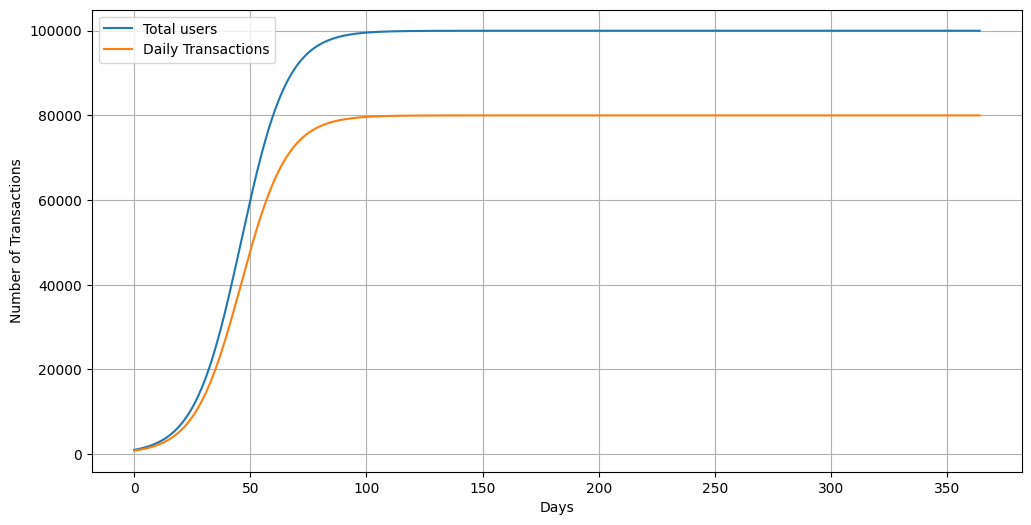

In [5]:
# Simulate this process
time = np.arange(time_steps)
users = logistic_growth(
    t=time,
    initial=initial_users,
    carrying_capacity=carrying_capacity,
    rate=growth_rate,
)
daily_transactions = users * 0.8  # when 80% of the users use the wallet daily

# plot these results
plt.figure(figsize=(12, 6))
plt.plot(time, users, label="Total users")
plt.plot(time, daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.legend()
plt.grid(True)
plt.show()

## Growth Simulation with BTC Hashrate Influence

This section integrates Bitcoin (BTC) hashrate data from the CoinGecko API to dynamically adjust the growth rate for the number of users. The simulation models how changes in BTC's hashrate influence another cyrptocurrency's adoption and daily transactions.

---

### **Step-by-Step Explanation**

1. **Fetch BTC Hashrate Data**:
   - The script fetches BTC market data from the CoinGecko API.
   - **Endpoint**: `https://api.coingecko.com/api/v3/coins/bitcoin/market_chart`
   - Parameters:
     - `vs_currency="usd"`: Currency for the data.
     - `days="365"`: Retrieves data for the past year.
   - In this example, prices are used as a proxy for hashrate due to API limitations. Replace `"prices"` with `"hashrate"` if accurate hashrate data is available.

2. **Normalize BTC Hashrate**:
   - Normalizes the fetched data to scale values between 0 and 1:
     \[
     \text{Normalized Value} = \frac{\text{Value} - \min(\text{Values})}{\max(\text{Values}) - \min(\text{Values})}
     \]

3. **Set Model Parameters**:
   - **`initial_users`**: Starting user base (`1000`).
   - **`carrying_capacity`**: Maximum potential user base (`100,000`), assumed to correlate with BTC hashrate.
   - **`base_growth_rate`**: Base growth rate (`0.10` or 10% per time step).

4. **Adjust Growth Rate by BTC Hashrate**:
   - Adjusts the growth rate proportionally to the normalized BTC hashrate:
     \[
     \text{Growth Rate} = \text{Base Growth Rate} \times \text{BTC Hashrate (Normalized)}
     \]

5. **Simulate User Growth and Transactions**:
   - **Logistic Growth Function**:
     - Computes user growth over `time_steps` (length of hashrate data).
   - **Daily Transactions**:
     - Assumes 80% of users make transactions daily:
       \[
       \text{Daily Transactions} = \text{Users} \times 0.8
       \]

6. **Visualization**:
   - Plots:
     - **Total Users** over time.
     - **Daily Transactions** over time.
   - Includes:
     - X-axis: Days.
     - Y-axis: Number of users or transactions.
     - Title: *"Growth Rate Simulation with Actual BTC Hashrate Influence"*
     - Gridlines and legend for clarity.

---

### **Purpose**
This simulation demonstrates how external factors like BTC's hashrate can influence user adoption and wallet usage. The dynamic growth rate adds realism, showcasing how real-world metrics impact adoption trends over time.

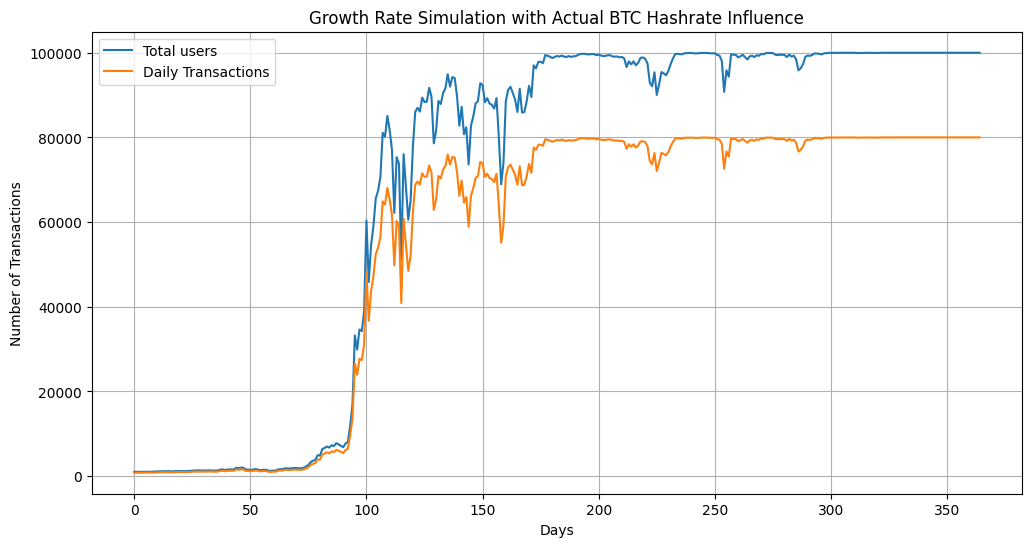

In [6]:
# Fetch BTC hashrate data from CoinGecko API
response = requests.get(
    "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart",
    params={"vs_currency": "usd", "days": "365"},
)
data = response.json()

# Extract the hashrate values (here we use prices as an example; replace with
# hashrate if available)
prices = np.array([item[1] for item in data["prices"]])

# Normalize the hashrate data
btc_hashrate_normalized = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))

# Use the length of the hashrate data as time_steps
time_steps = len(btc_hashrate_normalized)

# Parameters for the model
initial_users = 1000
carrying_capacity = (
    100000  # assumption: carrying capacity is highly correlated w/ hashrate
)
base_growth_rate = 0.10  # base growth rate per time step

# Adjust growth rate based on actual BTC hashrate
growth_rate = base_growth_rate * btc_hashrate_normalized


# Simulate this process
time = np.arange(time_steps)
users = logistic_growth(
    t=time,
    initial=initial_users,
    carrying_capacity=carrying_capacity,
    rate=growth_rate,
)
daily_transactions = users * 0.8  # when 80% of the users use the wallet daily

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, users, label="Total users")
plt.plot(time, daily_transactions, label="Daily Transactions")
plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with Actual BTC Hashrate Influence")
plt.legend()
plt.grid(True)
plt.show()

## **Converting Simulation Days to Calendar Dates**

### **What This Section Does**

1. **Set the Start Date**:
   - The simulation begins from the current date:
     ```python
     start_date = datetime.date.today()
     ```

2. **Convert Day Numbers to Dates**:
   - Transforms simulation day indices (`time`) into actual calendar dates by adding each day as a timedelta to the start date:
     ```python
     dates = [start_date + datetime.timedelta(days=int(day)) for day in time]
     ```

3. **Update the Plot**:
   - Uses the `dates` array on the x-axis instead of numeric day indices.
   - Plots:
     - **"Total Users"**: Growth of the user base over calendar dates.
     - **"Daily Transactions"**: Transaction volume over calendar dates.

4. **Customize Plot Appearance**:
   - Adds:
     - **X-axis Label**: "Date".
     - **Y-axis Label**: "Number of Transactions".
     - **Title**: "Growth Rate Simulation with Actual BTC Hashrate Influence".
   - Includes a legend and gridlines for better readability.

---

### **Purpose**
This section contextualizes the simulation results by aligning them with real-world calendar dates, making the data more interpretable for time-based analyses.


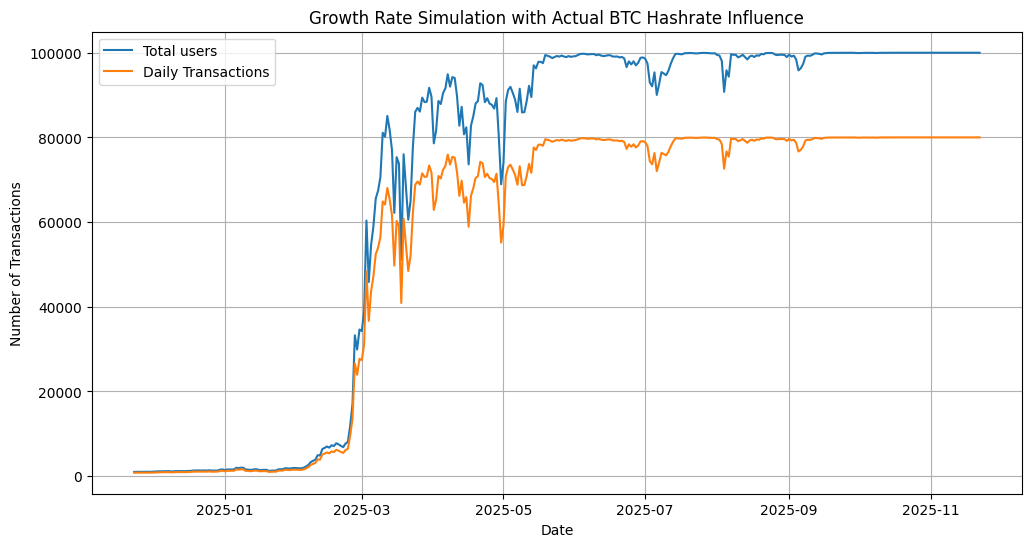

In [7]:
# Define the start date (e.g., today)
start_date = datetime.date.today()

# Convert day numbers to actual dates
dates = [start_date + datetime.timedelta(days=int(day)) for day in time]

# Then you can use these dates for your x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(dates, users, label="Total users")
plt.plot(dates, daily_transactions, label="Daily Transactions")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with Actual BTC Hashrate Influence")
plt.legend()
plt.grid(True)
plt.show()

## **Monte Carlo Simulation of Growth Rate with Confidence Intervals**

### **What This Section Does**

1. **Set Parameters**:
   - **`initial_users`**: Starting number of users (`1000`).
   - **`carrying_capacity`**: Maximum potential user base (`100,000`).
   - **`base_growth_rate`**: Baseline growth rate per time step (`0.10` or 10%).
   - **`time_steps`**: Duration of the simulation (`365` days).
   - **`num_simulations`**: Number of Monte Carlo simulation runs (`1000`).

2. **Simulate Multiple Runs**:
   - Generates random variation in the growth rate for each simulation using a normal distribution:
     ```python
     random_growth_rate = base_growth_rate + np.random.normal(0, 0.01, size=time.shape)
     ```
   - Computes logistic growth for each simulation:
     ```python
        users = logistic_growth(
            t=time,
            initial=initial_users,
            carrying_capacity=carrying_capacity,
            rate=random_growth_rate,
        )
     ```
   - Stores the results in `all_users` (a 2D array with rows for each simulation and columns for days).

3. **Calculate Confidence Intervals**:
   - Defines confidence levels (`99.9%`, `99.99%`, `99.999%`).
   - For each level:
     - Calculates lower and upper percentiles.
     - Extracts corresponding bounds for user growth:
       ```python
       lower_bound = np.percentile(all_users, lower_percentile, axis=0)
       upper_bound = np.percentile(all_users, upper_percentile, axis=0)
       ```

4. **Plot the Results**:
   - **Median Prediction**:
     - Plots the median user growth across all simulations as a central trend.
   - **Confidence Intervals**:
     - Fills the area between the lower and upper bounds for each confidence level, providing a range of possible outcomes.

5. **Customize Plot Appearance**:
   - Labels:
     - **X-axis**: "Days".
     - **Y-axis**: "Number of Transactions".
     - **Title**: "Growth Rate Simulation with Confidence Intervals".
   - Includes a legend and gridlines for better readability.

---

### **Purpose**
This section uses Monte Carlo simulations to account for randomness in the growth rate and provides confidence intervals to illustrate the uncertainty in predictions. It offers a robust method for understanding the range of possible outcomes for user growth and transactions over time.


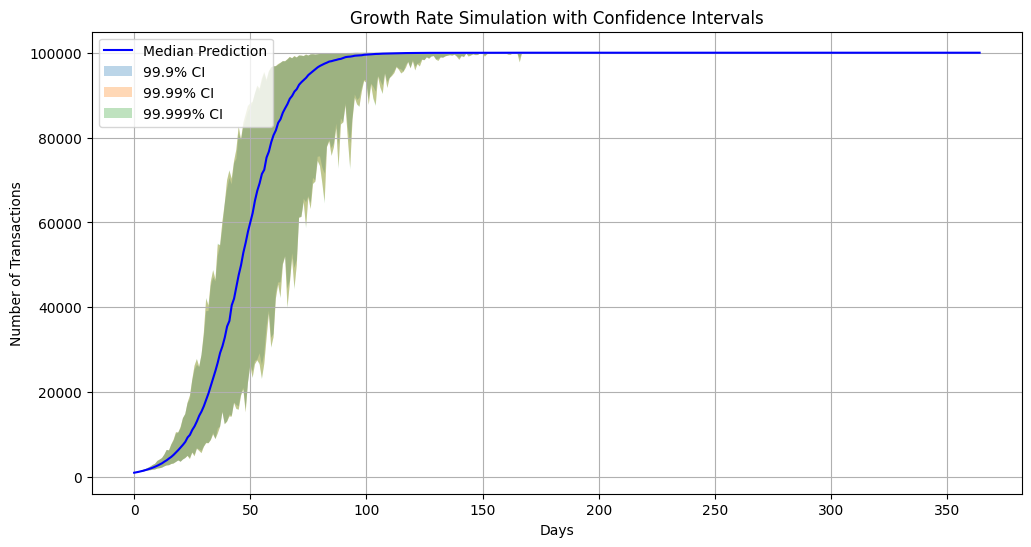

In [8]:
## Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
time_steps = 365  # Simulate for one year
num_simulations = 1000  # Number of Monte Carlo simulations


## Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    ## Add randomness to the growth rate, ensuring the shape matches `time`
    random_growth_rate = base_growth_rate + np.random.normal(
        0,
        0.01,
        size=time.shape,
    )

    ## Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

## Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

## Plot the results
plt.figure(figsize=(12, 6))

## Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

## Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time,
        lower_bound,
        upper_bound,
        alpha=0.3,
        label=f"{confidence_level}% CI",
    )

plt.xlabel("Days")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

## **Growth Rate Simulation with Quarterly Phases and Confidence Intervals**

### **What This Section Does**

1. **Set Parameters**:
   - **`initial_users`**: Starting number of users (`1000`).
   - **`carrying_capacity`**: Maximum potential user base (`100,000`).
   - **`base_growth_rate`**: Baseline growth rate per time step (`0.10` or 10%).
   - **`days_in_quarter`**: Days in one quarter (`91`).
   - **`time_steps`**: Total days for four quarters (`364`).
   - **`num_simulations`**: Number of Monte Carlo simulation runs (`1000`).

2. **Simulate Multiple Runs**:
   - Adds randomness to the growth rate for each simulation using a normal distribution:
     ```python
     random_growth_rate = base_growth_rate + np.random.normal(0, 0.01, size=time.shape)
     ```
   - Computes logistic growth for each simulation:
     ```python
        users = logistic_growth(
            t=time,
            initial=initial_users,
            carrying_capacity=carrying_capacity,
            rate=random_growth_rate,
        )
     ```
   - Stores results for all simulations in `all_users` (a 2D array).

3. **Calculate Confidence Intervals**:
   - Defines confidence levels (`99.9%`, `99.99%`, `99.999%`).
   - For each level:
     - Computes the lower and upper percentiles.
     - Extracts corresponding bounds for user growth:
       ```python
       lower_bound = np.percentile(all_users, lower_percentile, axis=0)
       upper_bound = np.percentile(all_users, upper_percentile, axis=0)
       ```

4. **Define Quarterly Ticks**:
   - Divides the simulation into four quarters:
     - Labels: `["Q1", "Q2", "Q3", "Q4"]`.
     - Ticks: Placed evenly along the x-axis based on `time_steps`.

5. **Plot the Results**:
   - **Median Prediction**:
     - Plots the median user growth across all simulations as the central trend.
   - **Confidence Intervals**:
     - Fills the area between the lower and upper bounds for each confidence level to represent uncertainty.

6. **Customize the Plot**:
   - **X-Axis**: Reflects quarterly phases (`Q1` to `Q4`).
   - **Y-Axis**: Represents the number of transactions or users.
   - **Title**: *"Growth Rate Simulation with Quarterly Phases and Confidence Intervals"*.
   - Includes gridlines and a legend for clarity.

---

### **Purpose**
This section models user growth and transactions over quarterly phases, incorporating randomness in the growth rate via Monte Carlo simulations. Confidence intervals provide a robust representation of the range of possible outcomes for each quarter.


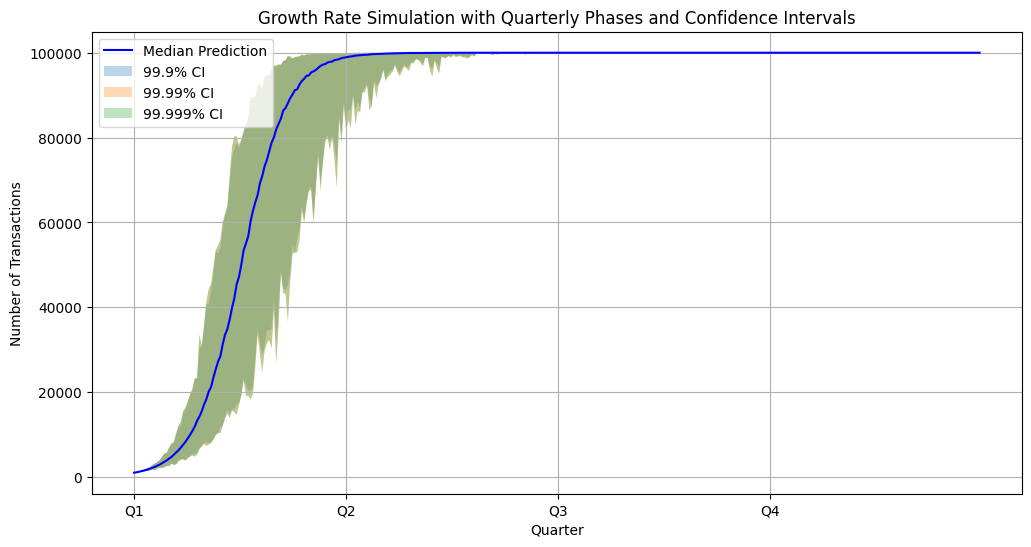

In [9]:
## Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
days_in_quarter = 91  # Approximate days per quarter
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations


## Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    ## Add randomness to the growth rate, ensuring the shape matches `time`
    random_growth_rate = base_growth_rate + np.random.normal(
        0,
        0.01,
        size=time.shape,
    )

    ## Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

## Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

## Define the quarters for plotting
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

## Plot the results
plt.figure(figsize=(12, 6))

## Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

## Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time,
        lower_bound,
        upper_bound,
        alpha=0.3,
        label=f"{confidence_level}% CI",
    )

## Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)

plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with Quarterly Phases and Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

## **Simulating with Sample (Arbitrary) BTC Hashrate Data by Quarters**

### **What This Section Does**

1. **Generate Sample BTC Hashrate Data**:
   - Simulates daily BTC hashrate data for the past year using a normal distribution:
     ```python
     btc_hashrate_data = np.random.normal(150, 10, 365)
     ```
   - Replace this with actual hashrate data for accurate results.

2. **Normalize the Hashrate Data**:
   - Scales the data to a range between 0 and 1 for consistency:
     ```python
     btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
         np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
     )
     ```

3. **Define Quarters**:
   - Divides the year into four quarters, each with approximately 91 days:
     ```python
     days_in_quarter = 91
     quarters = ["Q1", "Q2", "Q3", "Q4"]
     ```

4. **Divide Hashrate Data into Quarters**:
   - Slices the normalized hashrate data into four parts, corresponding to the quarters:
     ```python
     btc_hashrate_quarters = [
         btc_hashrate_normalized[:days_in_quarter],
         btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
         btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
         btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
     ]
     ```

5. **Combine Quarters for Simulation**:
   - Concatenates the quarterly hashrate data into a single array for use in simulations:
     ```python
     btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)
     ```

---

### **Purpose**
This section prepares BTC hashrate data by normalizing it and dividing it into quarterly segments. The processed data is then used for simulations, providing a realistic input to model user adoption and transaction growth.


In [10]:
## Sample BTC hashrate data (replace this with actual data fetching)
## Let's assume we have daily hashrate data for the last year
btc_hashrate_data = np.random.normal(150, 10, 365)

## Normalize the hashrate data
btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
    np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
)

## Define the quarters
days_in_quarter = 91  # Approximate days per quarter
quarters = ["Q1", "Q2", "Q3", "Q4"]

## Divide the hashrate data into quarters
btc_hashrate_quarters = [
    btc_hashrate_normalized[:days_in_quarter],
    btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
    btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
    btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
]

## Combine quarters into a single array for simulation
btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)

## **Growth Rate Simulation with BTC Hashrate Influence and Quarterly Phases**

### **What This Section Does**

1. **Set Parameters**:
   - **`initial_users`**: Starting number of users (`1000`).
   - **`carrying_capacity`**: Maximum potential user base (`100,000`).
   - **`base_growth_rate`**: Baseline growth rate per time step (`0.10` or 10%).
   - **`time_steps`**: Total days for four quarters (`364` days).
   - **`num_simulations`**: Number of Monte Carlo simulation runs (`1000`).

2. **Simulate Multiple Runs**:
   - Adjusts the growth rate using normalized BTC hashrate data and adds randomness:
     ```python
     random_growth_rate = (
         base_growth_rate * btc_hashrate_for_simulation
         + np.random.normal(0, 0.01, size=time.shape)
     )
     ```
   - Computes logistic growth for each simulation using the adjusted growth rate:
     ```python
     users = logistic_growth(
         t=time,
         initial=initial_users,
         carrying_capacity=carrying_capacity,
         rate=random_growth_rate,
     )
     ```
   - Stores results for all simulations in `all_users`.

3. **Calculate Confidence Intervals**:
   - Defines confidence levels (`99.9%`, `99.99%`, `99.999%`).
   - For each level:
     - Computes the lower and upper percentiles.
     - Extracts corresponding bounds for user growth:
       ```python
       lower_bound = np.percentile(all_users, lower_percentile, axis=0)
       upper_bound = np.percentile(all_users, upper_percentile, axis=0)
       ```

4. **Define Quarterly Ticks**:
   - Divides the simulation into four quarters and sets x-axis ticks accordingly:
     ```python
     quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]
     ```

5. **Plot the Results**:
   - **Median Prediction**:
     - Plots the median user growth across all simulations as the central trend.
   - **Confidence Intervals**:
     - Fills the area between the lower and upper bounds for each confidence level to represent uncertainty.

6. **Customize the Plot**:
   - **X-Axis**: Reflects quarterly phases (`Q1` to `Q4`).
   - **Y-Axis**: Represents the number of transactions or users.
   - **Title**: *"Growth Rate Simulation with BTC Hashrate Influence and Quarterly Phases"*.
   - Includes gridlines and a legend for clarity.

---

### **Purpose**
This section models user growth and transactions over four quarters, incorporating real-world BTC hashrate data to influence the growth rate dynamically. The addition of Monte Carlo simulations and confidence intervals provides a robust view of potential outcomes and uncertainty for each quarter.


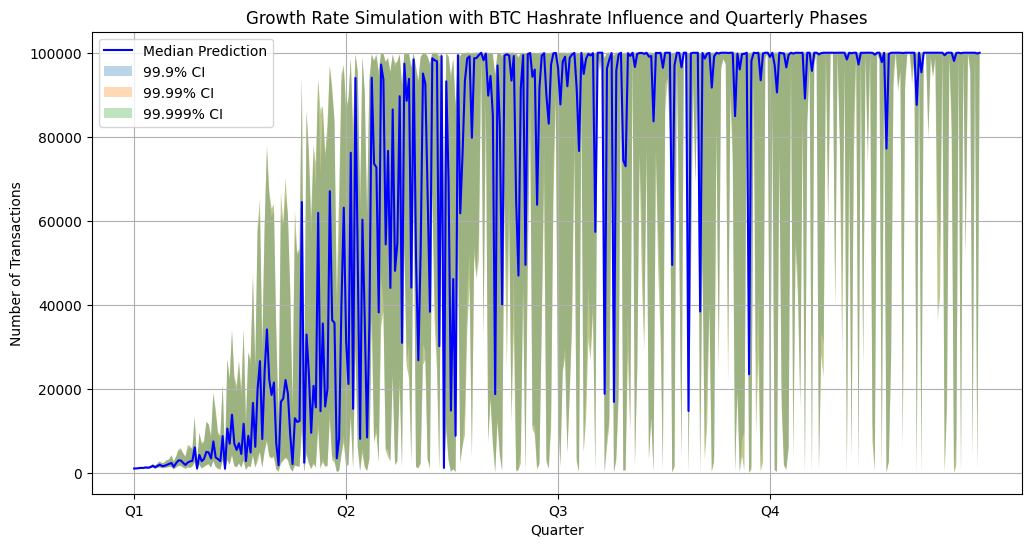

In [11]:
## Parameters
initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations

## Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array

for _ in range(num_simulations):
    # Modify the growth rate based on actual hashrates per quarter
    random_growth_rate = (
        base_growth_rate * btc_hashrate_for_simulation
        + np.random.normal(0, 0.01, size=time.shape)
    )

    # Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )
    all_users.append(users)

all_users = np.array(all_users)

## Calculate percentiles for confidence intervals
confidence_levels = [99.9, 99.99, 99.999]  # Confidence levels
confidence_intervals = {}

for confidence_level in confidence_levels:
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(all_users, lower_percentile, axis=0)
    upper_bound = np.percentile(all_users, upper_percentile, axis=0)
    confidence_intervals[confidence_level] = (lower_bound, upper_bound)

## Define the quarters for plotting
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]

## Plot the results
plt.figure(figsize=(12, 6))

## Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(time, median_prediction, label="Median Prediction", color="blue")

## Plot confidence intervals
for confidence_level, (lower_bound, upper_bound) in confidence_intervals.items():
    plt.fill_between(
        time,
        lower_bound,
        upper_bound,
        alpha=0.3,
        label=f"{confidence_level}% CI",
    )

## Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)

plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with BTC Hashrate Influence and Quarterly Phases")
plt.legend()
plt.grid(True)
plt.show()

## **Growth Rate Simulation with 99.9% Confidence Interval**

### **What This Section Does**

1. **Set Parameters**:
   - **`initial_users`**: Starting number of users (`1000`).
   - **`carrying_capacity`**: Maximum potential user base (`100,000`).
   - **`base_growth_rate`**: Baseline growth rate per time step (`0.10` or 10%).
   - **`days_in_quarter`**: Approximate days per quarter (`91`).
   - **`time_steps`**: Total days for four quarters (`364`).
   - **`num_simulations`**: Number of Monte Carlo simulation runs (`1000`).

2. **Sample BTC Hashrate Data**:
   - Simulates BTC hashrate data using a normal distribution with a mean of `150` and standard deviation of `10`:
     ```python
     btc_hashrate_data = np.random.normal(150, 10, 365)
     ```
   - Replace this with actual BTC hashrate data for more accurate results.

3. **Normalize Hashrate Data**:
   - Scales BTC hashrate data to a range between 0 and 1:
     ```python
     btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
         np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
     )
     ```

4. **Divide Hashrate into Quarters**:
   - Splits the normalized hashrate data into four quarters:
     ```python
     btc_hashrate_quarters = [
         btc_hashrate_normalized[:days_in_quarter],
         btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
         btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
         btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
     ]
     ```
   - Combines the quarterly data for simulation:
     ```python
     btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)
     ```

5. **Simulate Growth with Monte Carlo**:
   - Modifies the growth rate for each simulation using BTC hashrate and randomness:
     ```python
     random_growth_rate = (
         base_growth_rate * btc_hashrate_for_simulation
         + np.random.normal(0, 0.01, size=time.shape)
     )
     ```
   - Computes user growth using the `logistic_growth` function and stores results for all simulations in `all_users`.

6. **Calculate 99.9% Confidence Interval**:
   - Computes the lower and upper percentiles for the 99.9% confidence interval:
     ```python
     lower_percentile = (100 - confidence_level) / 2
     upper_percentile = 100 - lower_percentile
     lower_bound = np.percentile(all_users, lower_percentile, axis=0)
     upper_bound = np.percentile(all_users, upper_percentile, axis=0)
     ```

7. **Define Quarters for Plotting**:
   - Sets the x-axis ticks to represent the four quarters:
     ```python
     quarters = ["Q1", "Q2", "Q3", "Q4"]
     quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]
     ```

8. **Plot the Results**:
   - **Median Prediction**:
     - Plots the median user growth across all simulations.
   - **99.9% Confidence Interval**:
     - Fills the area between the lower and upper bounds with a shaded region.
   - Customizes the plot:
     - **X-Axis**: Quarters (`Q1`, `Q2`, etc.).
     - **Y-Axis**: Number of transactions or users.
     - **Title**: "Growth Rate Simulation with 99.9% Confidence Interval".
   - Includes a legend and gridlines for clarity.

---

### **Purpose**
This section models user growth and transactions over four quarters, incorporating randomness and BTC hashrate influence. It provides a robust visualization with a 99.9% confidence interval, showing the range of potential outcomes for user adoption and transaction growth.


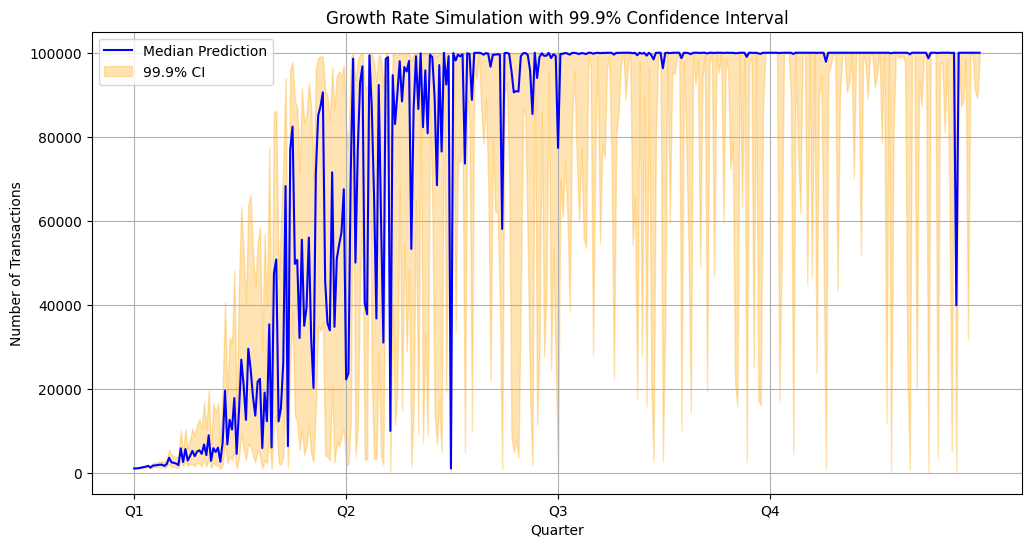

In [ ]:
## Parameters

initial_users = 1000
carrying_capacity = 100000
base_growth_rate = 0.10  # base growth rate per time step
days_in_quarter = 91  # Approximate days per quarter
time_steps = days_in_quarter * 4  # Simulate for four quarters
num_simulations = 1000  # Number of Monte Carlo simulations

## Sample BTC hashrate data (replace this with actual data fetching)

btc_hashrate_data = np.random.normal(
    150, 10, 365
)  # Replace with actual BTC hashrate data

## Normalize the hashrate data
btc_hashrate_normalized = (btc_hashrate_data - np.min(btc_hashrate_data)) / (
    np.max(btc_hashrate_data) - np.min(btc_hashrate_data)
)


## Divide the hashrate data into quarters
btc_hashrate_quarters = [
    btc_hashrate_normalized[:days_in_quarter],
    btc_hashrate_normalized[days_in_quarter : 2 * days_in_quarter],
    btc_hashrate_normalized[2 * days_in_quarter : 3 * days_in_quarter],
    btc_hashrate_normalized[3 * days_in_quarter : 4 * days_in_quarter],
]


## Combine quarters into a single array for simulation
btc_hashrate_for_simulation = np.concatenate(btc_hashrate_quarters)

## Simulate multiple runs
all_users = []
time = np.arange(time_steps)  # Create the time array


for _ in range(num_simulations):
    ## Modify the growth rate based on actual hashrates per quarter
    random_growth_rate = (
        base_growth_rate * btc_hashrate_for_simulation
        + np.random.normal(0, 0.01, size=time.shape)
    )

    ## Compute the logistic growth for this simulation
    users = logistic_growth(
        t=time,
        initial=initial_users,
        carrying_capacity=carrying_capacity,
        rate=random_growth_rate,
    )

    all_users.append(users)

all_users = np.array(all_users)


## Calculate the 99.9% confidence interval
confidence_level = 99.9
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
lower_bound = np.percentile(all_users, lower_percentile, axis=0)
upper_bound = np.percentile(all_users, upper_percentile, axis=0)


## Define the quarters for plotting
quarters = ["Q1", "Q2", "Q3", "Q4"]
quarter_ticks = np.linspace(0, time_steps, num=5)[:-1]


## Plot the results
plt.figure(figsize=(12, 6))

## Plot the median prediction
median_prediction = np.median(all_users, axis=0)
plt.plot(
    time,
    median_prediction,
    label="Median Prediction",
    color="blue",
)

## Plot the 99.9% confidence interval
plt.fill_between(
    time,
    lower_bound,
    upper_bound,
    alpha=0.3,
    label=f"99.9% CI",
    color="orange",
)

## Customize the x-axis to reflect quarters
plt.xticks(quarter_ticks, quarters)
plt.xlabel("Quarter")
plt.ylabel("Number of Transactions")
plt.title("Growth Rate Simulation with 99.9% Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()